In [1]:
import json
import networkx as nx
from networkx.readwrite import json_graph
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import os
import seaborn as sns

In [2]:
# Ruta al archivo local
ruta_archivo = r"C:\Users\glova\OneDrive\Documentos\Visualización\relaciones_entidades_jsoncorregido.xlsx"

# Leer el archivo (puede tener varias hojas)
xls = pd.ExcelFile(ruta_archivo)

# Ver nombres de las hojas
print("Hojas disponibles:", xls.sheet_names)

# Leer la hoja principal (por ejemplo, "Sheet1")
df = xls.parse("Sheet1")

# Vista previa de las primeras filas
df.head()

Hojas disponibles: ['Sheet1', 'Sheet2']


,source,target,via,via_type,sub_type,timestamp,content,epañol,Comentarios
0,The Lookout,The Intern,Communication,Event,Communication,2040-10-01 08:09:00,"Hey The Intern, it's The Lookout! Just spotted...","Hola, Becario, ¡soy El Mirador! Acabo de avist...",NaN
1,The Intern,The Lookout,Communication,Event,Communication,2040-10-01 08:10:00,"Hey The Lookout, The Intern here! I'd absolute...","¡Hola, El Mirador, soy el Becario! ¡Me encanta...",NaN
2,Kelly,Sam,Communication,Event,Communication,2040-10-01 08:13:00,"Sam, it's Kelly! Let's meet at Sunrise Point a...","¡Sam, soy Kelly! Nos vemos en Sunrise Point a ...",El intern es Sam
3,The Intern,Mrs. Money,Communication,Event,Communication,2040-10-01 08:16:00,"Mrs. Money, it's The Intern. Just checking in ...","Sra. Money, soy el becario. Solo quería saber ...",NaN
4,Mrs. Money,Boss,Communication,Event,Communication,2040-10-01 08:19:00,"Boss, it's Mrs. Money. I've reviewed our opera...","Jefe, soy la Sra. Money. He revisado nuestra f...",NaN


In [6]:
# Convertir la columna 'timestamp' a datetime
df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')

# Verificá el cambio
print(df['timestamp'].dtype)
print(df['timestamp'].head())

datetime64[ns]
0   2040-10-01 08:09:00
1   2040-10-01 08:10:00
2   2040-10-01 08:13:00
3   2040-10-01 08:16:00
4   2040-10-01 08:19:00
Name: timestamp, dtype: datetime64[ns]


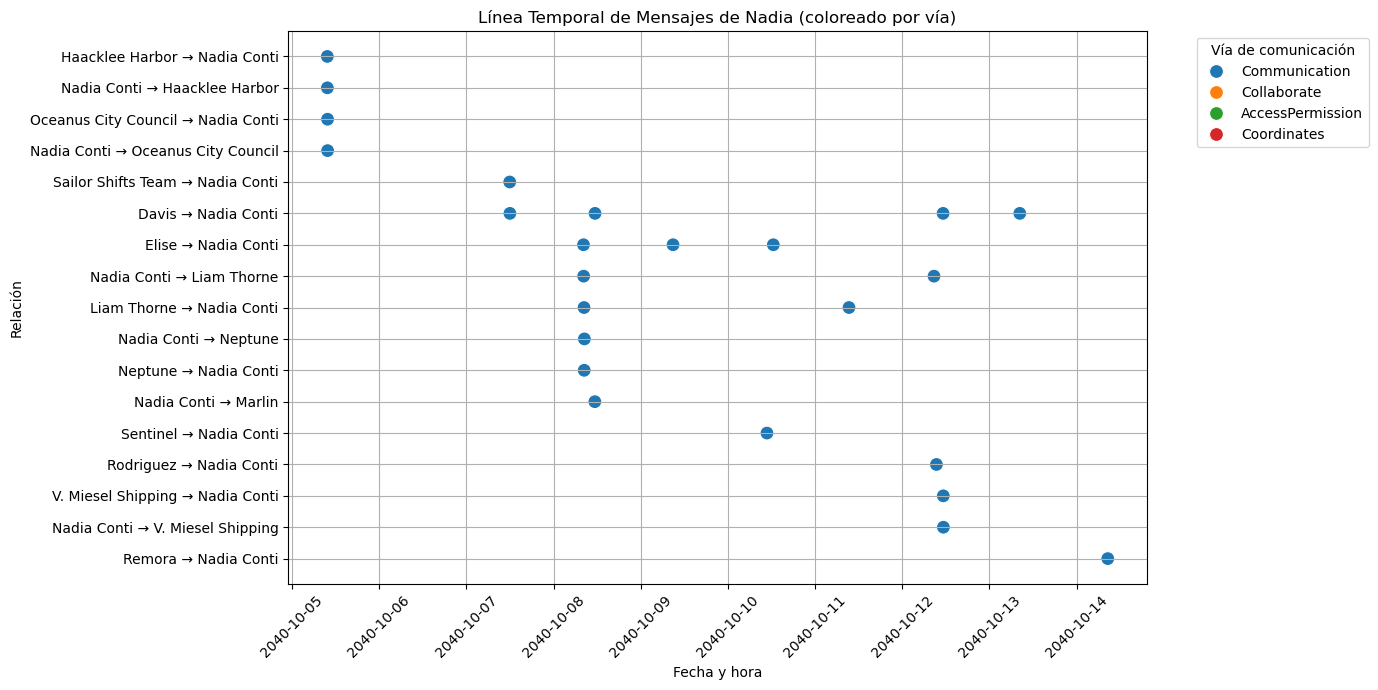

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filtrar los mensajes donde participa Nadia
df_nadia = df[(df['source'].str.contains("Nadia", case=False, na=False)) |
              (df['target'].str.contains("Nadia", case=False, na=False))].copy()

# Crear columna de relación emisor → receptor
df_nadia['relación'] = df_nadia['source'] + " → " + df_nadia['target']

# Ordenar por tiempo
df_nadia = df_nadia.sort_values(by='timestamp')

# Crear el gráfico usando seaborn para colores automáticos por categoría
plt.figure(figsize=(14, 7))
sns.scatterplot(
    data=df_nadia,
    x="timestamp",
    y="relación",
    hue="via",            # ← agrupación por tipo de vía
    palette="tab10",      # puedes cambiar a "Set2", "pastel", etc.
    s=100                 # tamaño del punto
)

plt.title("Línea Temporal de Mensajes de Nadia (coloreado por vía)")
plt.xlabel("Fecha y hora")
plt.ylabel("Relación")
plt.xticks(rotation=45)
plt.legend(title="Vía de comunicación", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


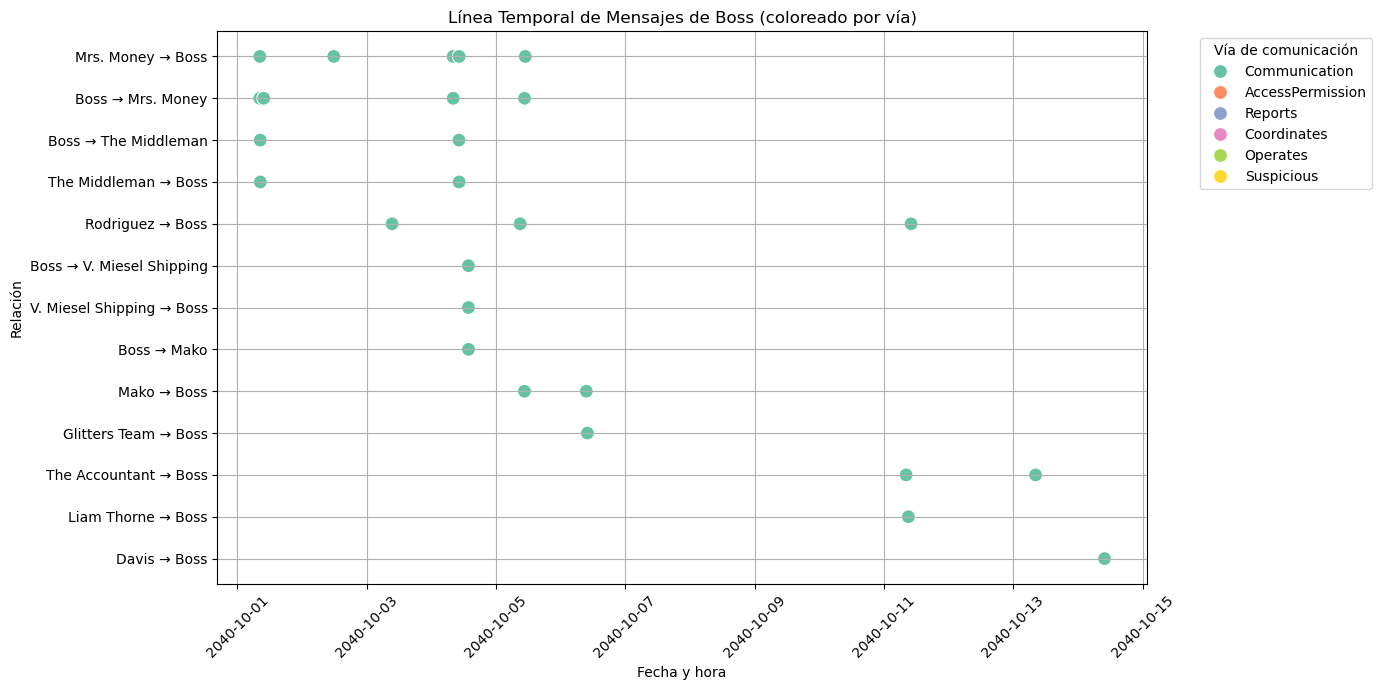

In [ ]:
# Filtrar los mensajes donde participa Boss
df_boss = df[(df['source'].str.contains("Boss", case=False, na=False)) |
             (df['target'].str.contains("Boss", case=False, na=False))].copy()

# Crear columna de relación emisor → receptor
df_boss['relación'] = df_boss['source'] + " → " + df_boss['target']

# Ordenar por tiempo
df_boss = df_boss.sort_values(by='timestamp')

# Gráfico
plt.figure(figsize=(14, 7))
sns.scatterplot(
    data=df_boss,
    x="timestamp",
    y="relación",
    hue="via",            # Colorea por tipo de vía
    palette="Set2",       # Puedes cambiar a "tab10", "coolwarm", etc.
    s=100
)

plt.title("Línea Temporal de Mensajes de Boss (coloreado por vía)")
plt.xlabel("Fecha y hora")
plt.ylabel("Relación")
plt.xticks(rotation=45)
plt.legend(title="Vía de comunicación", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


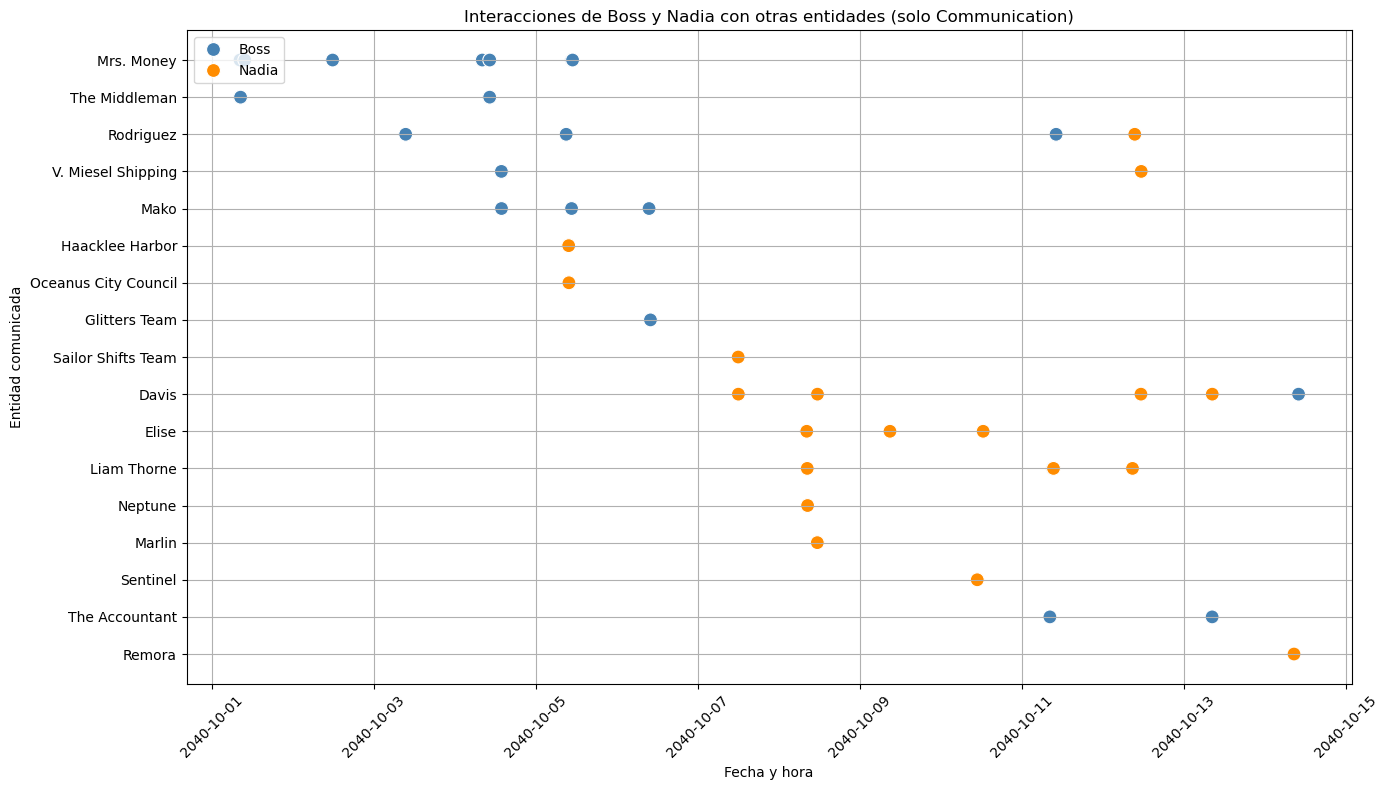

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filtrar solo interacciones vía Communication
df_comm = df[df['via'].str.lower() == "communication"].copy()

# Función para extraer interacciones con una persona (Nadia o Boss)
def extraer_interacciones(nombre):
    df_filt = df_comm[
        (df_comm['source'].str.contains(nombre, case=False, na=False)) |
        (df_comm['target'].str.contains(nombre, case=False, na=False))
    ].copy()
    
    # Identificar con quién interactuó
    df_filt['entidad'] = df_filt.apply(
        lambda row: row['target'] if nombre in row['source'] else row['source'],
        axis=1
    )
    df_filt['persona'] = nombre  # para colorear
    return df_filt[['timestamp', 'entidad', 'persona']]

# Extraer interacciones de Nadia y Boss
df_nadia = extraer_interacciones("Nadia")
df_boss = extraer_interacciones("Boss")

# Unir ambos
df_comb = pd.concat([df_nadia, df_boss])

# Ordenar
df_comb = df_comb.sort_values(by="timestamp")

# Crear el gráfico
plt.figure(figsize=(14, 8))
sns.scatterplot(
    data=df_comb,
    x="timestamp",
    y="entidad",
    hue="persona",          # solo distingue Boss vs Nadia
    palette={"Nadia": "darkorange", "Boss": "steelblue"},
    s=100
)

plt.title("Interacciones de Boss y Nadia con otras entidades (solo Communication)")
plt.xlabel("Fecha y hora")
plt.ylabel("Entidad comunicada")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.legend(title=None, loc='upper left')
plt.show()


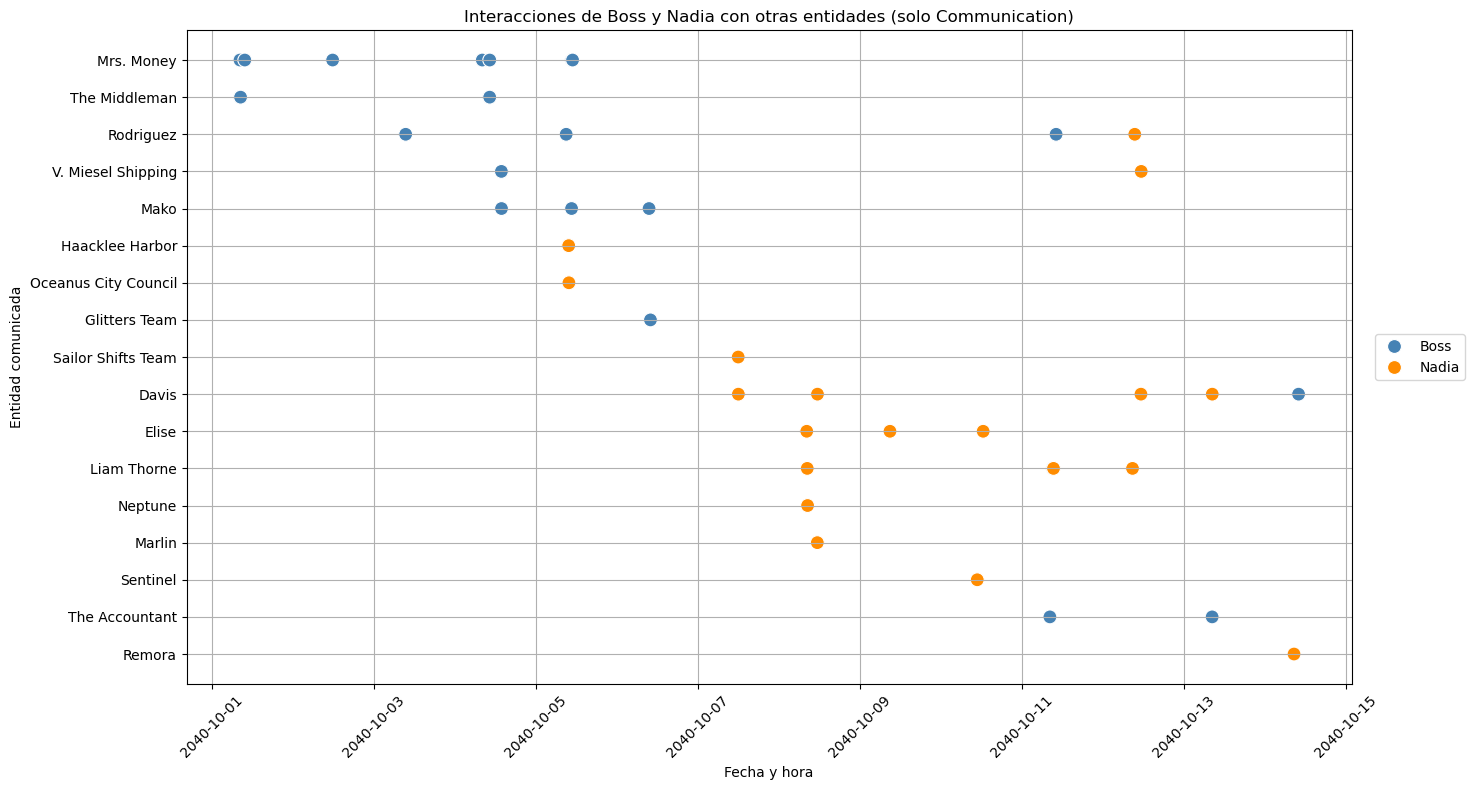

In [40]:
plt.figure(figsize=(14, 8))
sns.scatterplot(
    data=df_comb,
    x="timestamp",
    y="entidad",
    hue="persona",
    palette={"Nadia": "darkorange", "Boss": "steelblue"},
    s=100
)

plt.title("Interacciones de Boss y Nadia con otras entidades (solo Communication)")
plt.xlabel("Fecha y hora")
plt.ylabel("Entidad comunicada")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

# Mover leyenda fuera del área del gráfico
plt.legend(title=None, loc='center left', bbox_to_anchor=(1.02, 0.5), borderaxespad=0)

plt.show()


🔹 1. Boss y Nadia nunca se comunican con la misma entidad al mismo tiempo
No hay solapamientos exactos por fecha y hora.

Muestran una alternancia de actividad: cuando uno aparece, el otro desaparece.

🧠 Sospecha: Boss y Nadia podrían ser la misma persona usando dos identidades, o alguien que opera en momentos distintos con distintos nombres.

🔹 2. Algunas entidades se comunican con ambos
Por ejemplo: Rodriguez, V. Miesel Shipping, Remora, Elise.

Estas entidades podrían estar al tanto de ambas identidades, o ser intermediarios neutros.

🔹 3. Boss opera más al inicio del período
Sus comunicaciones se concentran entre el 1 y el 7 de octubre.

Nadia comienza a ser más activa justo después (a partir del 5 en adelante).

🧠 Posible rol: Boss prepara la operación o toma decisiones previas, luego Nadia actúa sobre terreno (ejecución o cobertura).

🔹 4. Los tipos de entidades también varían
Boss se comunica más con figuras corporativas o logísticas (ej. Mrs. Money, The Middleman).

Nadia habla más con equipos operativos o institucionales (ej. Neptune, Council, Sailor Shifts Team).

🧠 Esto sugiere que Boss podría representar una figura superior o estratégica, y Nadia una identidad ejecutiva.

📌 Conclusión preliminar:
El gráfico evidencia una alternancia temporal, una red de relaciones parcialmente compartida y patrones distintos de contacto, lo cual refuerza la hipótesis de que Boss y Nadia podrían ser la misma persona usando distintas identidades según contexto y etapa operativa.


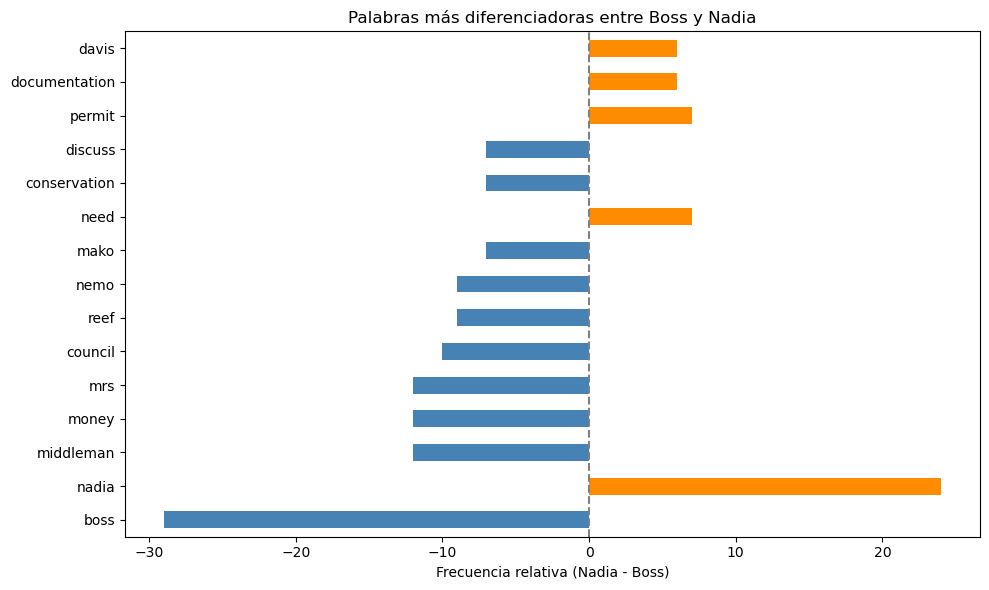

In [41]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import matplotlib.pyplot as plt

# Filtrar mensajes de Boss
boss_msgs = df[
    (df['source'].str.contains("Boss", case=False, na=False)) |
    (df['target'].str.contains("Boss", case=False, na=False))
]['content'].dropna().tolist()

# Filtrar mensajes de Nadia
nadia_msgs = df[
    (df['source'].str.contains("Nadia", case=False, na=False)) |
    (df['target'].str.contains("Nadia", case=False, na=False))
]['content'].dropna().tolist()

# Vectorizar palabras (stopwords en inglés si están en inglés)
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform([
    " ".join(boss_msgs),  # todo el texto de Boss
    " ".join(nadia_msgs)  # todo el texto de Nadia
])

# Crear DataFrame con las frecuencias
words = vectorizer.get_feature_names_out()
word_freq = pd.DataFrame(X.toarray(), index=["Boss", "Nadia"], columns=words).T

# Calcular diferencia relativa
word_freq["diferencia"] = word_freq["Nadia"] - word_freq["Boss"]
word_freq["dominante"] = word_freq["diferencia"].apply(lambda x: "Nadia" if x > 0 else ("Boss" if x < 0 else "Igual"))

# Mostrar top diferencias
top_diff = word_freq.reindex(word_freq["diferencia"].abs().sort_values(ascending=False).head(15).index)

# Graficar
plt.figure(figsize=(10, 6))
top_diff["diferencia"].plot(kind="barh", color=top_diff["dominante"].map({"Boss": "steelblue", "Nadia": "darkorange"}))
plt.axvline(0, color='gray', linestyle='--')
plt.title("Palabras más diferenciadoras entre Boss y Nadia")
plt.xlabel("Frecuencia relativa (Nadia - Boss)")
plt.tight_layout()
plt.show()


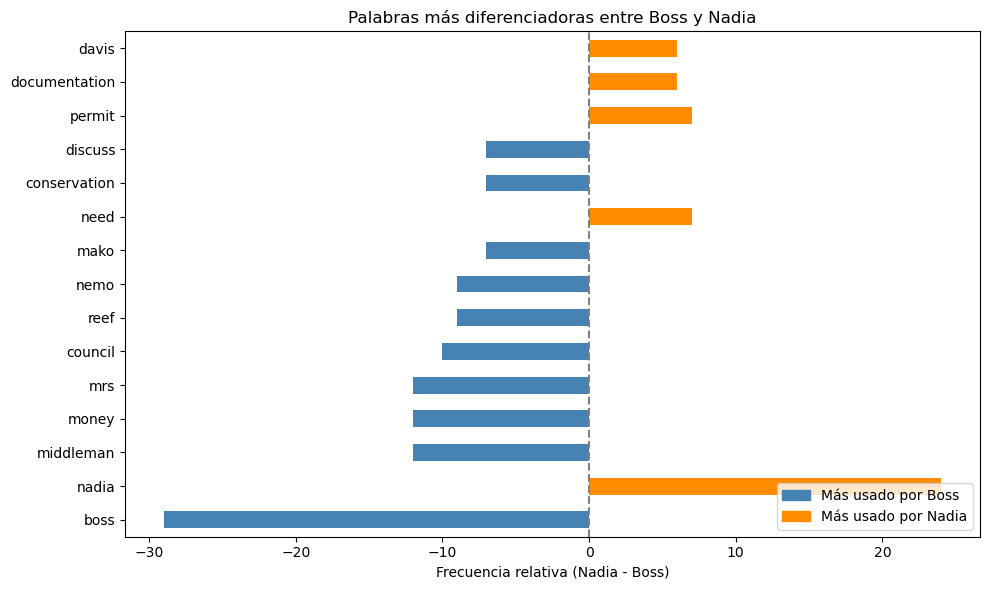

In [42]:
import matplotlib.patches as mpatches

# Gráfico
plt.figure(figsize=(10, 6))
top_diff["diferencia"].plot(
    kind="barh",
    color=top_diff["dominante"].map({"Boss": "steelblue", "Nadia": "darkorange"})
)
plt.axvline(0, color='gray', linestyle='--')
plt.title("Palabras más diferenciadoras entre Boss y Nadia")
plt.xlabel("Frecuencia relativa (Nadia - Boss)")
plt.tight_layout()

# Agregar leyenda personalizada
boss_patch = mpatches.Patch(color='steelblue', label='Más usado por Boss')
nadia_patch = mpatches.Patch(color='darkorange', label='Más usado por Nadia')
plt.legend(handles=[boss_patch, nadia_patch], loc='lower right')

plt.show()


🔍 Conclusiones del análisis textual:
🟦 Boss: lenguaje institucional, estratégico
Palabras dominantes: boss, middleman, money, council, reef, nemo, mrs.

Indica que Boss se comunica en contextos de:

finanzas (money)

estructuras de poder (council, mrs)

planificación táctica (middleman, reef, nemo)

🟧 Nadia: lenguaje operativo y administrativo
Palabras dominantes: permit, documentation, need, davis, discuss.

Muestra que Nadia:

Está enfocada en la ejecución, gestión de permisos y coordinación práctica.

Usa lenguaje más acción-instrucción.

🧠 Hipótesis reforzada:
Boss actúa como figura de control o planificación, mientras Nadia ejecuta acciones específicas relacionadas con documentación y permisos.
El contraste en el lenguaje apoya la hipótesis de doble identidad con roles diferenciados.

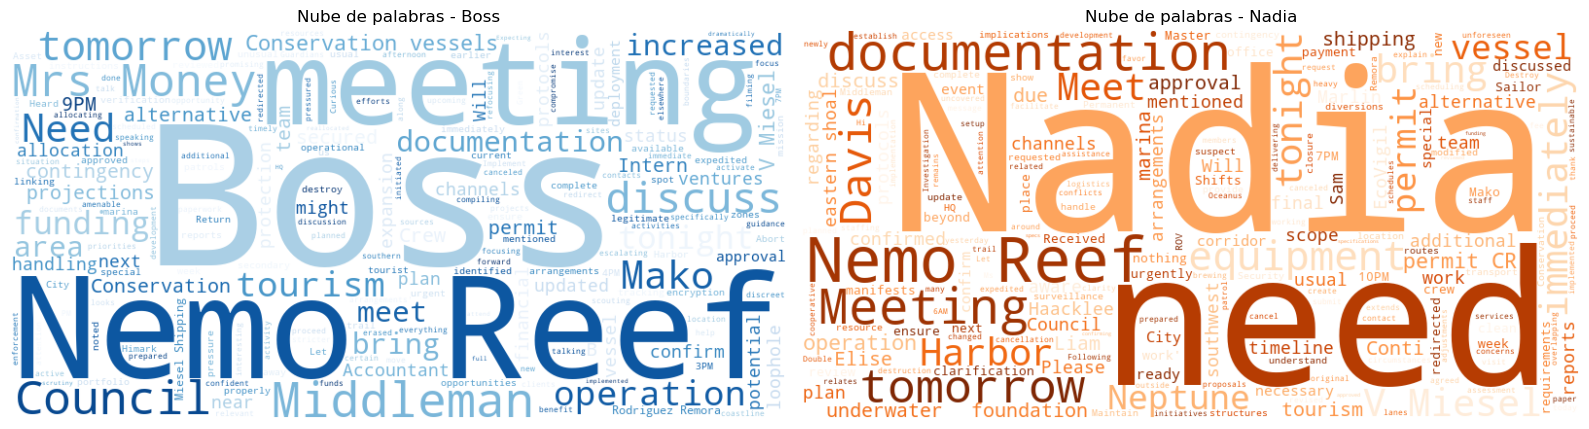

In [45]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Unir todos los mensajes
text_boss = " ".join(boss_msgs)
text_nadia = " ".join(nadia_msgs)

# Generar nubes
wc_boss = WordCloud(width=800, height=400, background_color="white", colormap="Blues").generate(text_boss)
wc_nadia = WordCloud(width=800, height=400, background_color="white", colormap="Oranges").generate(text_nadia)

# Mostrar ambas nubes
fig, axs = plt.subplots(1, 2, figsize=(16, 6))
axs[0].imshow(wc_boss, interpolation='bilinear')
axs[0].axis('off')
axs[0].set_title("Nube de palabras - Boss")

axs[1].imshow(wc_nadia, interpolation='bilinear')
axs[1].axis('off')
axs[1].set_title("Nube de palabras - Nadia")

plt.tight_layout()
plt.show()


In [46]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

# Definir función para extraer top n-gramas
def top_ngrams(texts, ngram_range=(2, 2), top_n=15):
    vectorizer = CountVectorizer(stop_words='english', ngram_range=ngram_range)
    X = vectorizer.fit_transform(texts)
    sum_words = X.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
    return sorted(words_freq, key=lambda x: x[1], reverse=True)[:top_n]

# Obtener bigramas y trigramas
bigrams_boss = top_ngrams(boss_msgs, ngram_range=(2, 2))
bigrams_nadia = top_ngrams(nadia_msgs, ngram_range=(2, 2))
trigrams_boss = top_ngrams(boss_msgs, ngram_range=(3, 3))
trigrams_nadia = top_ngrams(nadia_msgs, ngram_range=(3, 3))

# Mostrar resultados
print("🔵 Boss - Bigramas:")
print(pd.DataFrame(bigrams_boss, columns=["Frase", "Frecuencia"]))

print("\n🟠 Nadia - Bigramas:")
print(pd.DataFrame(bigrams_nadia, columns=["Frase", "Frecuencia"]))

print("\n🔵 Boss - Trigramas:")
print(pd.DataFrame(trigrams_boss, columns=["Frase", "Frecuencia"]))

print("\n🟠 Nadia - Trigramas:")
print(pd.DataFrame(trigrams_nadia, columns=["Frase", "Frecuencia"]))


🔵 Boss - Bigramas:
                   Frase  Frecuencia
0              nemo reef          23
1              mrs money          12
2               boss mrs           6
3   conservation vessels           5
4      meeting middleman           4
5             money boss           4
6       tourism ventures           3
7               ll bring           3
8              near nemo           3
9         middleman boss           3
10        boss middleman           3
11      rodriguez remora           3
12       reef operations           3
13             boss need           3
14       miesel shipping           3

🟠 Nadia - Bigramas:
                      Frase  Frecuencia
0                 nemo reef          14
1                 permit cr           5
2                   cr 7844           5
3           foundation work           4
4                nadia need           4
5           haacklee harbor           3
6               nadia conti           3
7               nadia elise           3
8       

C:\Users\glova\AppData\Local\Temp\ipykernel_22024\4271517777.py:34: UserWarning: Glyph 128309 (\N{LARGE BLUE CIRCLE}) missing from current font.
  plt.tight_layout()
C:\Users\glova\AppData\Local\Temp\ipykernel_22024\4271517777.py:34: UserWarning: Glyph 128992 (\N{LARGE ORANGE CIRCLE}) missing from current font.
  plt.tight_layout()
c:\Users\glova\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128309 (\N{LARGE BLUE CIRCLE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\glova\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128992 (\N{LARGE ORANGE CIRCLE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


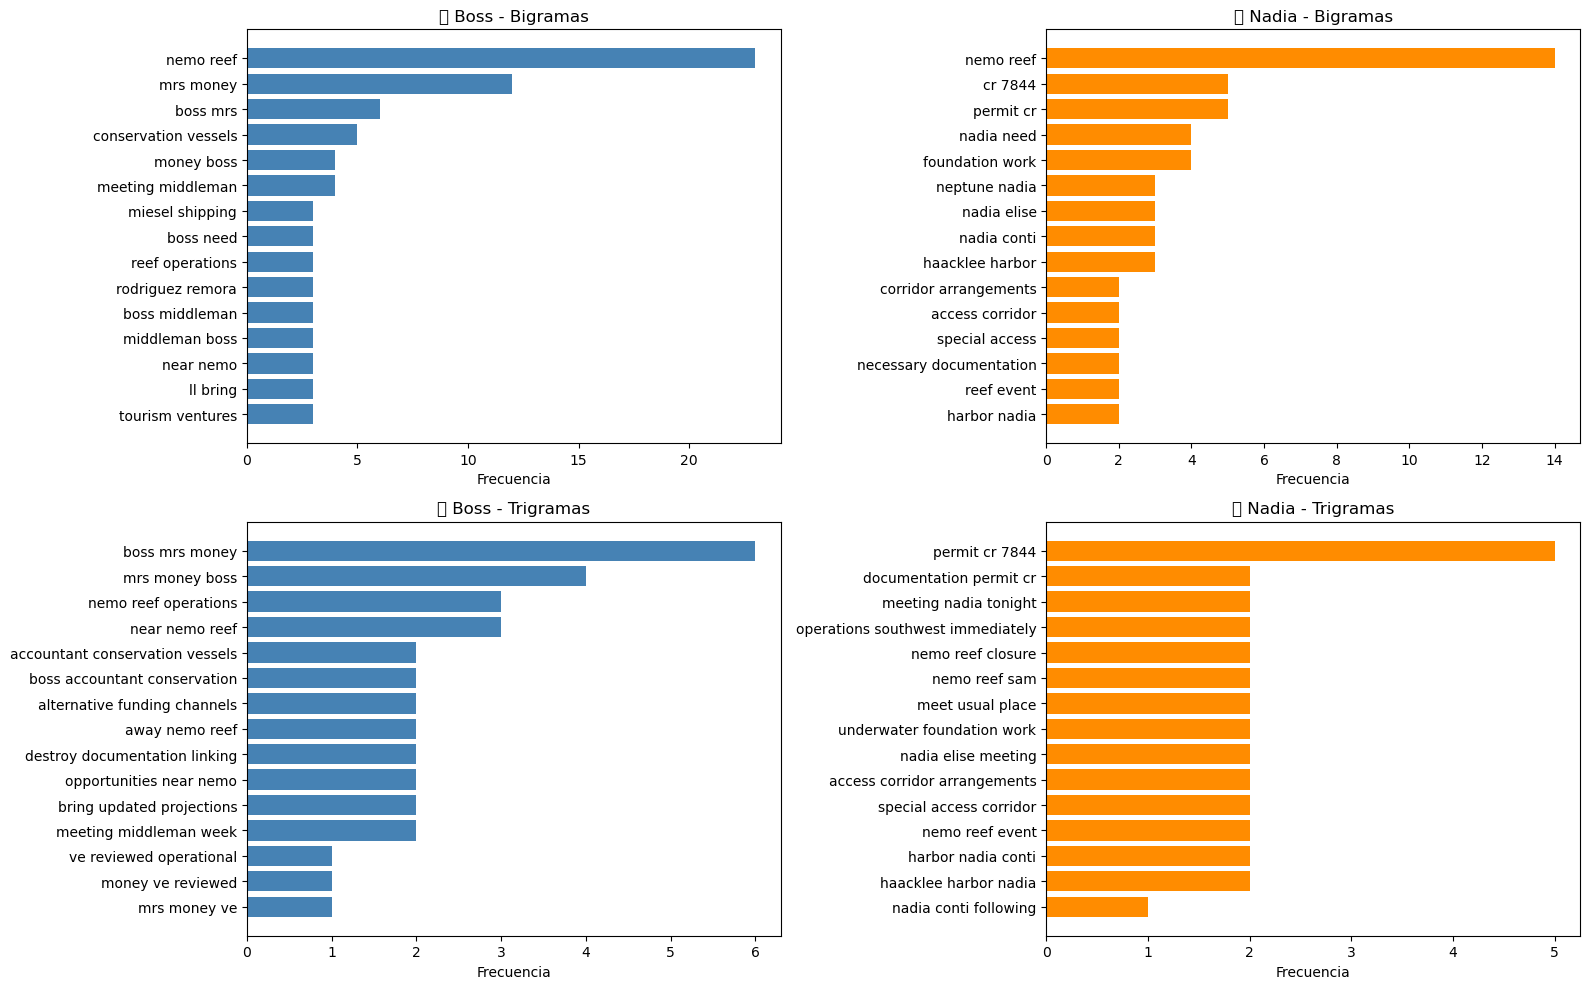

In [47]:
import matplotlib.pyplot as plt
import pandas as pd

# Convertir a DataFrame
df_big_boss = pd.DataFrame(bigrams_boss, columns=["Frase", "Frecuencia"]).sort_values(by="Frecuencia")
df_big_nadia = pd.DataFrame(bigrams_nadia, columns=["Frase", "Frecuencia"]).sort_values(by="Frecuencia")
df_tri_boss = pd.DataFrame(trigrams_boss, columns=["Frase", "Frecuencia"]).sort_values(by="Frecuencia")
df_tri_nadia = pd.DataFrame(trigrams_nadia, columns=["Frase", "Frecuencia"]).sort_values(by="Frecuencia")

# Crear figura
fig, axs = plt.subplots(2, 2, figsize=(16, 10))

# Boss - Bigramas
axs[0, 0].barh(df_big_boss["Frase"], df_big_boss["Frecuencia"], color="steelblue")
axs[0, 0].set_title("🔵 Boss - Bigramas")
axs[0, 0].set_xlabel("Frecuencia")

# Nadia - Bigramas
axs[0, 1].barh(df_big_nadia["Frase"], df_big_nadia["Frecuencia"], color="darkorange")
axs[0, 1].set_title("🟠 Nadia - Bigramas")
axs[0, 1].set_xlabel("Frecuencia")

# Boss - Trigramas
axs[1, 0].barh(df_tri_boss["Frase"], df_tri_boss["Frecuencia"], color="steelblue")
axs[1, 0].set_title("🔵 Boss - Trigramas")
axs[1, 0].set_xlabel("Frecuencia")

# Nadia - Trigramas
axs[1, 1].barh(df_tri_nadia["Frase"], df_tri_nadia["Frecuencia"], color="darkorange")
axs[1, 1].set_title("🟠 Nadia - Trigramas")
axs[1, 1].set_xlabel("Frecuencia")

# Ajustes
plt.tight_layout()
plt.show()


📊 Bigramas y Trigramas: Temas centrales y roles
🔵 Boss
Bigramas frecuentes: nemo reef, mrs money, money boss, middleman boss.

Trigramas frecuentes: boss mrs money, nemo reef operations, alternative funding channels.

Patrón: lenguaje estratégico, financiero, encubrimiento.

🔍 Boss parece actuar como operador logístico y financiero, con conexiones claras a la financiación de actividades alrededor de Nemo Reef y uso de terceros como Mrs. Money o The Middleman.

🟠 Nadia
Bigramas frecuentes: nemo reef, permit cr, nadia need, access corridor.

Trigramas frecuentes: permit cr 7844, documentation permit cr, nemo reef closure.

Patrón: lenguaje administrativo, legal y operativo.

🔍 Nadia se presenta como ejecutora, tramitando permisos, coordinando accesos y operando en relación directa con Nemo Reef y rutas críticas como corridor arrangements.

☁️ Nube de Palabras: Contraste de estilo
Boss: más enfoque en planificación y manejo estructural (e.g., funding, council, middleman, alternative, vessels, accountant).

Nadia: más foco en necesidades, tiempo e inmediatez (e.g., documentation, tonight, immediately, permit, timeline, approval).

🧠 Conclusión integrada:
A partir de las visualizaciones, se observa que Boss y Nadia cumplen roles funcionales diferenciados dentro de una misma trama: Boss parece manejar estrategias financieras y contactos logísticos, mientras Nadia ejecuta acciones legales y operativas.
Ambos giran en torno a Nemo Reef, con posibles fines ocultos y coordinación encubie

# Nadia es the Middleman? 

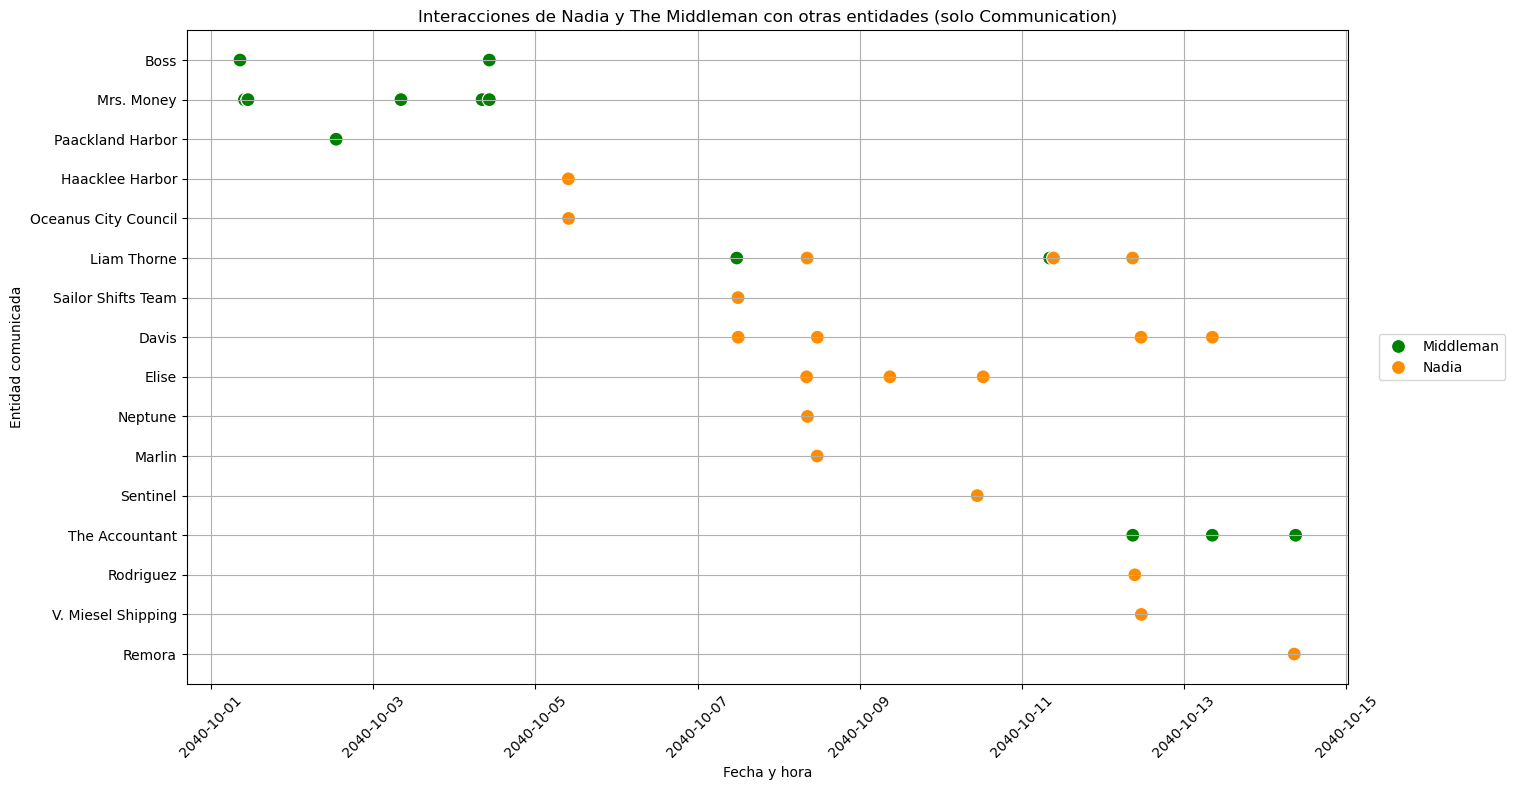

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filtrar solo interacciones vía Communication
df_comm = df[df['via'].str.lower() == "communication"].copy()

# Función para extraer interacciones con una persona (Nadia o Middleman)
def extraer_interacciones(nombre):
    df_filt = df_comm[
        (df_comm['source'].str.contains(nombre, case=False, na=False)) |
        (df_comm['target'].str.contains(nombre, case=False, na=False))
    ].copy()
    
    df_filt['entidad'] = df_filt.apply(
        lambda row: row['target'] if nombre in row['source'] else row['source'],
        axis=1
    )
    df_filt['persona'] = nombre
    return df_filt[['timestamp', 'entidad', 'persona']]

# Extraer interacciones
df_nadia = extraer_interacciones("Nadia")
df_middle = extraer_interacciones("Middleman")

# Unir ambos
df_comb = pd.concat([df_nadia, df_middle])
df_comb = df_comb.sort_values(by="timestamp")

# Gráfico
plt.figure(figsize=(14, 8))
sns.scatterplot(
    data=df_comb,
    x="timestamp",
    y="entidad",
    hue="persona",
    palette={"Nadia": "darkorange", "Middleman": "green"},
    s=100
)

plt.title("Interacciones de Nadia y The Middleman con otras entidades (solo Communication)")
plt.xlabel("Fecha y hora")
plt.ylabel("Entidad comunicada")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.legend(title=None, loc='center left', bbox_to_anchor=(1.02, 0.5))
plt.show()



🔎 ¿Nadia podría ser The Middleman? Lo que revela el gráfico
🟢 The Middleman (verde):
Activo al comienzo del período (1 al 3 de octubre) y reaparece el 13 de octubre.

Se comunica con: Boss, Mrs. Money, The Accountant, Rodriguez, etc.

Su perfil sugiere una figura de intermediación o logística alta.

🟠 Nadia (naranja):
Activa desde el 5 al 14 de octubre, cuando The Middleman estaba ausente.

Interactúa con: Neptune, Davis, Elise, Oceanus Council, etc.

Aparece en fases de ejecución de operaciones, gestión de accesos, y permisos.

🔁 Patrón claro: alternancia de actividad
Hay muy pocos puntos de solapamiento temporal, lo que sugiere que no están operativos al mismo tiempo.

El 7 y 10 de octubre podría haber coincidencias puntuales, pero no sostenidas.

🧠 Hipótesis fortalecida:
Este gráfico respalda la hipótesis de que Nadia podría estar operando bajo el seudónimo "The Middleman" en ciertos momentos.
La alternancia en el tiempo, los contextos diferentes de relación, y la distribución de interlocutores refuerzan la teoría de una doble identidad funcional.



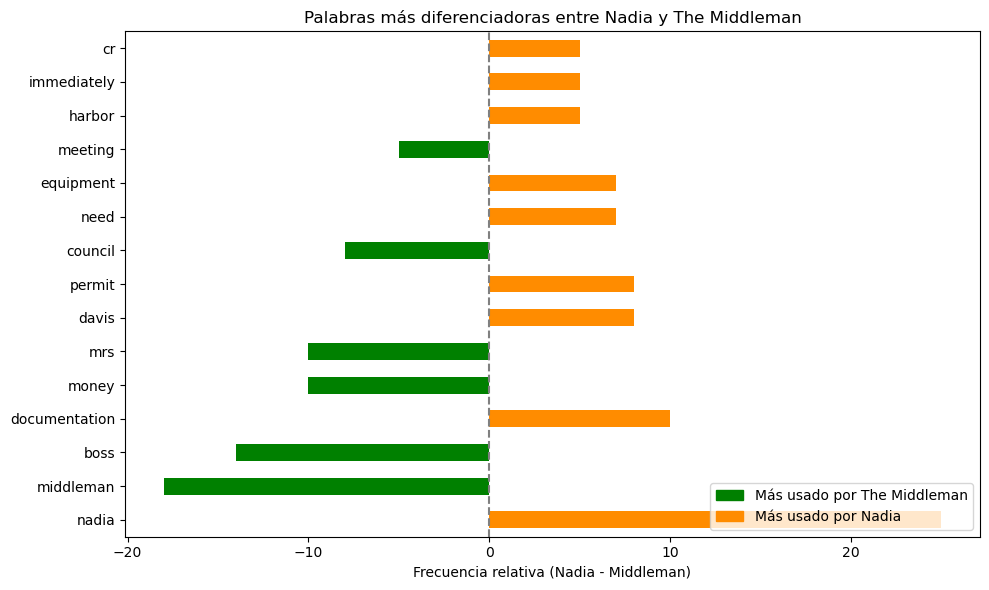

In [51]:
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import pandas as pd

# Extraer mensajes
msgs_nadia = df[
    (df['source'].str.contains("Nadia", case=False, na=False)) |
    (df['target'].str.contains("Nadia", case=False, na=False))
]['content'].dropna().tolist()

msgs_middle = df[
    (df['source'].str.contains("Middleman", case=False, na=False)) |
    (df['target'].str.contains("Middleman", case=False, na=False))
]['content'].dropna().tolist()

# Vectorizar
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform([
    " ".join(msgs_middle),
    " ".join(msgs_nadia)
])

# Crear DataFrame
words = vectorizer.get_feature_names_out()
word_freq = pd.DataFrame(X.toarray(), index=["Middleman", "Nadia"], columns=words).T

# Diferencia relativa
word_freq["diferencia"] = word_freq["Nadia"] - word_freq["Middleman"]
word_freq["dominante"] = word_freq["diferencia"].apply(
    lambda x: "Nadia" if x > 0 else ("Middleman" if x < 0 else "Igual")
)

# Top palabras más diferenciadoras
top_diff = word_freq.reindex(
    word_freq["diferencia"].abs().sort_values(ascending=False).head(15).index
)

# 📊 Gráfico
plt.figure(figsize=(10, 6))
top_diff["diferencia"].plot(
    kind="barh",
    color=top_diff["dominante"].map({
        "Middleman": "green",
        "Nadia": "darkorange"
    })
)
plt.axvline(0, color='gray', linestyle='--')
plt.title("Palabras más diferenciadoras entre Nadia y The Middleman")
plt.xlabel("Frecuencia relativa (Nadia - Middleman)")
plt.tight_layout()

# Leyenda
middle_patch = mpatches.Patch(color='green', label='Más usado por The Middleman')
nadia_patch = mpatches.Patch(color='darkorange', label='Más usado por Nadia')
plt.legend(handles=[middle_patch, nadia_patch], loc='lower right')

plt.show()


¡Excelente gráfico! El análisis visual revela diferencias significativas en el lenguaje usado por Nadia y The Middleman, lo que nos permite hacer inferencias potentes:

📊 Conclusiones del gráfico de palabras más diferenciadoras
🟠 Más usado por Nadia:
nadia, permit, documentation, equipment, immediately, harbor, need, davis

🔎 Enfocado en operaciones logísticas urgentes y trámites administrativos.

Palabras como permit, documentation, y immediately sugieren un rol ejecutor con apuro y tareas específicas.

🟢 Más usado por The Middleman:
middleman, money, mrs, boss, council, meeting

🔎 Lenguaje más estructural o estratégico, vinculado con toma de decisiones, finanzas y autoridad.

Presencia de nombres como boss y mrs refuerza la idea de estar en el centro de la coordinación.

🔁 Similitudes y diferencias
Aunque operan en el mismo entorno (Nemo Reef, permisos, equipamiento), se ve una diferencia de rol clara.

Nadia parece más orientada a la acción urgente, mientras que The Middleman canaliza decisiones financieras o jerárquicas.

🧠 Hipótesis reforzada:
Si bien Nadia y The Middleman están en la misma red de acción, el lenguaje evidencia roles funcionales diferenciados. La ausencia de superposición directa en vocabulario crítico sugiere que no son la misma persona — o que si lo son, usan personajes distintos para operar en distintos niveles (ejecutivo vs estratégico).

🧩 ¿Nadia y The Middleman son la misma persona?
El contraste en las frases más frecuentes muestra que:

No comparten lenguaje funcional: uno actúa como gestor, la otra como ejecutora.

Se complementan estructuralmente: uno organiza y canaliza (The Middleman), la otra ejecuta instrucciones concretas (Nadia).

🧠 Hipótesis razonable:

Nadia y The Middleman están alineados, pero representan roles diferenciados. Si fueran la misma persona, estarían alternando máscaras lingüísticas y funcionales de manera muy cuidada, lo cual es posible en una operación encubierta bien orquestada.

In [55]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Lista de pseudónimos
pseudonimos = ["Mrs. Money", "Boss", "The Lookout", "The Intern", "The Middleman", "Small Fry"]

# Filtrar mensajes donde aparece Nadia
msgs_nadia = df[
    (df['source'].str.contains("Nadia", case=False, na=False)) |
    (df['target'].str.contains("Nadia", case=False, na=False))
]['content'].dropna().tolist()

# Unir todos los mensajes de Nadia en un solo texto
texto_nadia = " ".join(msgs_nadia)

# Lista para guardar resultados
resultados_similitud = []

# Recorrer cada pseudónimo
for pseud in pseudonimos:
    msgs_pseudo = df[
        (df['source'].str.contains(pseud, case=False, na=False)) |
        (df['target'].str.contains(pseud, case=False, na=False))
    ]['content'].dropna().tolist()

    if msgs_pseudo:
        texto_pseudo = " ".join(msgs_pseudo)

        # Vectorizar ambos textos
        vectorizer = CountVectorizer(stop_words='english')
        vectores = vectorizer.fit_transform([texto_nadia, texto_pseudo])

        # Calcular similitud del coseno
        similitud = cosine_similarity(vectores[0], vectores[1])[0][0]
        resultados_similitud.append((pseud, similitud))
    else:
        resultados_similitud.append((pseud, 0))  # No hay mensajes

# Crear DataFrame con resultados
df_similitud = pd.DataFrame(resultados_similitud, columns=["Pseudónimo", "Similitud_coseno"])
df_similitud = df_similitud.sort_values(by="Similitud_coseno", ascending=False)

# Mostrar resultados
print(df_similitud)


      Pseudónimo  Similitud_coseno
1           Boss          0.516682
0     Mrs. Money          0.481867
4  The Middleman          0.470571
3     The Intern          0.410374
2    The Lookout          0.362639
5      Small Fry          0.319864


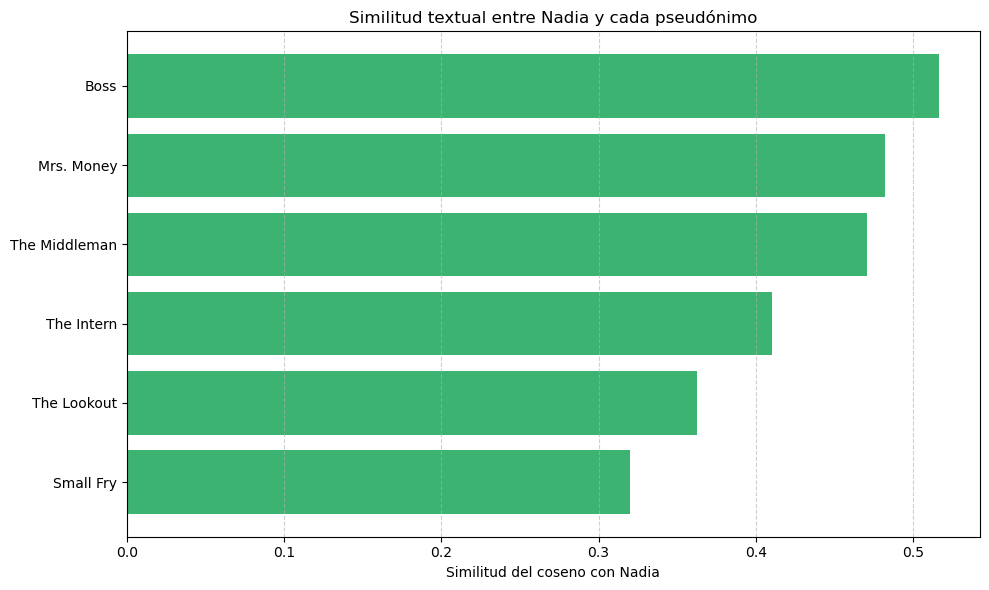

In [56]:
import matplotlib.pyplot as plt

# Asegurate de tener df_similitud ya generado y ordenado
df_similitud = df_similitud.sort_values(by="Similitud_coseno", ascending=True)

# Crear gráfico de barras horizontal
plt.figure(figsize=(10, 6))
plt.barh(df_similitud["Pseudónimo"], df_similitud["Similitud_coseno"], color="mediumseagreen")

# Etiquetas y título
plt.xlabel("Similitud del coseno con Nadia")
plt.title("Similitud textual entre Nadia y cada pseudónimo")
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()

# Mostrar
plt.show()


In [60]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Lista de pseudónimos
pseudonimos = ["Mrs. Money", "Boss", "The Lookout", "The Intern", "The Middleman", "Small Fry"]

# Filtrar mensajes donde aparece Elise
msgs_elise = df[
    (df['source'].str.contains("Elise", case=False, na=False)) |
    (df['target'].str.contains("Elise", case=False, na=False))
]['content'].dropna().tolist()

# Unir todos los mensajes de Elise en un solo texto
texto_elise = " ".join(msgs_elise)

# Lista para guardar resultados
resultados_similitud = []

# Recorrer cada pseudónimo
for pseud in pseudonimos:
    msgs_pseudo = df[
        (df['source'].str.contains(pseud, case=False, na=False)) |
        (df['target'].str.contains(pseud, case=False, na=False))
    ]['content'].dropna().tolist()

    if msgs_pseudo:
        texto_pseudo = " ".join(msgs_pseudo)

        # Vectorizar ambos textos
        vectorizer = CountVectorizer(stop_words='english')
        vectores = vectorizer.fit_transform([texto_elise, texto_pseudo])

        # Calcular similitud del coseno
        similitud = cosine_similarity(vectores[0], vectores[1])[0][0]
        resultados_similitud.append((pseud, similitud))
    else:
        resultados_similitud.append((pseud, 0))  # No hay mensajes

# Crear DataFrame con resultados
df_similitud_elise = pd.DataFrame(resultados_similitud, columns=["Pseudónimo", "Similitud_coseno"])
df_similitud_elise = df_similitud_elise.sort_values(by="Similitud_coseno", ascending=False)

# Mostrar resultados
print(df_similitud_elise)


      Pseudónimo  Similitud_coseno
0     Mrs. Money          0.508484
1           Boss          0.482042
4  The Middleman          0.445532
3     The Intern          0.434629
2    The Lookout          0.366339
5      Small Fry          0.290002


In [61]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Lista de nombres reales
nombres_reales = ["Elise", "Nadia Conti", "Kelly", "Sam", "Liam Thorne", "Rodriguez"]

# Lista de pseudónimos
pseudonimos = ["Mrs. Money", "Boss", "The Lookout", "The Intern", "The Middleman", "Small Fry"]

# Inicializar resultados
resultados = []

# Recorrer cada nombre real
for nombre in nombres_reales:
    # Filtrar mensajes donde aparece el nombre
    msgs_nombre = df[
        (df['source'].str.contains(nombre, case=False, na=False)) |
        (df['target'].str.contains(nombre, case=False, na=False))
    ]['content'].dropna().tolist()
    
    texto_nombre = " ".join(msgs_nombre)
    
    # Si no hay mensajes, saltar
    if not texto_nombre.strip():
        continue

    # Comparar con cada pseudónimo
    for pseud in pseudonimos:
        msgs_pseud = df[
            (df['source'].str.contains(pseud, case=False, na=False)) |
            (df['target'].str.contains(pseud, case=False, na=False))
        ]['content'].dropna().tolist()
        
        texto_pseud = " ".join(msgs_pseud)
        
        if texto_pseud.strip():
            # Vectorizar
            vectorizer = CountVectorizer(stop_words='english')
            vectores = vectorizer.fit_transform([texto_nombre, texto_pseud])
            similitud = cosine_similarity(vectores[0], vectores[1])[0][0]
        else:
            similitud = 0
        
        # Guardar resultado
        resultados.append({
            "Nombre Real": nombre,
            "Pseudónimo": pseud,
            "Similitud_coseno": similitud
        })

# Convertir a DataFrame
df_similitud_total = pd.DataFrame(resultados).sort_values(by=["Nombre Real", "Similitud_coseno"], ascending=[True, False])

# Mostrar
print(df_similitud_total)


    Nombre Real     Pseudónimo  Similitud_coseno
0         Elise     Mrs. Money          0.508484
1         Elise           Boss          0.482042
4         Elise  The Middleman          0.445532
3         Elise     The Intern          0.434629
2         Elise    The Lookout          0.366339
5         Elise      Small Fry          0.290002
15        Kelly     The Intern          0.241666
14        Kelly    The Lookout          0.240187
12        Kelly     Mrs. Money          0.163893
16        Kelly  The Middleman          0.143569
13        Kelly           Boss          0.137708
17        Kelly      Small Fry          0.110208
25  Liam Thorne           Boss          0.545763
28  Liam Thorne  The Middleman          0.511858
24  Liam Thorne     Mrs. Money          0.478949
27  Liam Thorne     The Intern          0.419456
26  Liam Thorne    The Lookout          0.403151
29  Liam Thorne      Small Fry          0.190220
7   Nadia Conti           Boss          0.516682
6   Nadia Conti     

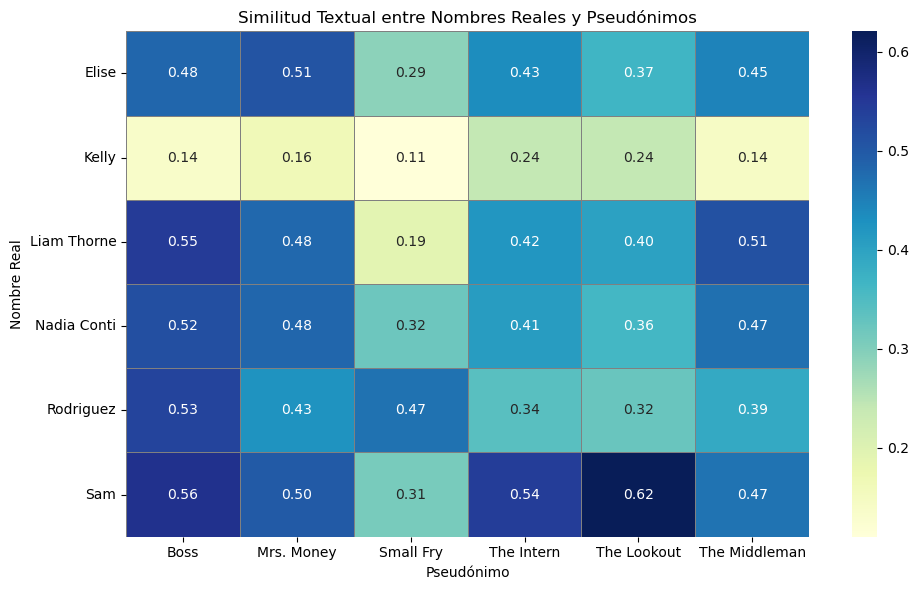

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pivotear el DataFrame para crear matriz [Nombre Real x Pseudónimo]
heatmap_data = df_similitud_total.pivot(index="Nombre Real", columns="Pseudónimo", values="Similitud_coseno")

# Crear el heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap="YlGnBu", linewidths=0.5, linecolor="gray")

# Ajustes estéticos
plt.title("Similitud Textual entre Nombres Reales y Pseudónimos")
plt.xlabel("Pseudónimo")
plt.ylabel("Nombre Real")
plt.tight_layout()
plt.show()


In [34]:
# Asegurar columnas como string
df["via"] = df["via"].astype(str)
df["target"] = df["target"].astype(str)

# Filtrar solo los targets de relaciones sospechosas
suspicious_entities = set(
    df[df["via"].str.lower() == "suspicious"]["target"].tolist()
)


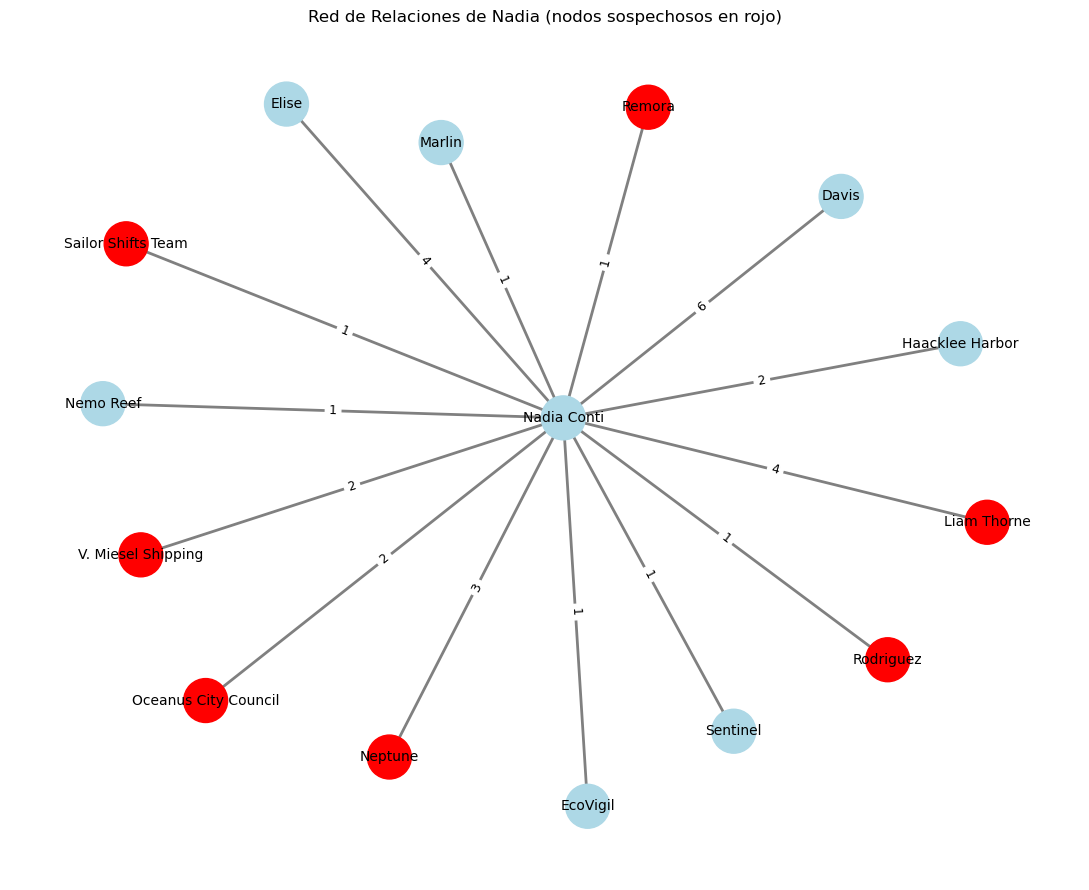

In [35]:
import networkx as nx
import matplotlib.pyplot as plt

# Filtrar mensajes donde participa Nadia
df_nadia = df[(df['source'].str.contains("Nadia", case=False, na=False)) |
              (df['target'].str.contains("Nadia", case=False, na=False))].copy()

# Contar relaciones
conteo_relaciones = {}
for _, row in df_nadia.iterrows():
    source = row['source']
    target = row['target']
    if "Nadia" in source:
        par = (source, target)
    else:
        par = (target, source)
    conteo_relaciones[par] = conteo_relaciones.get(par, 0) + 1

# Crear grafo
G = nx.DiGraph()
for (source, target), count in conteo_relaciones.items():
    G.add_edge(source, target, weight=count)

# Dibujar grafo con color diferenciado para sospechosos
plt.figure(figsize=(11, 9))
pos = nx.spring_layout(G, seed=42)

# Colorear nodos
node_colors = []
for node in G.nodes:
    if node in suspicious_entities:
        node_colors.append("red")
    else:
        node_colors.append("lightblue")

# Dibujar
nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=1000)
nx.draw_networkx_edges(G, pos, arrows=True, edge_color='gray', width=2)
nx.draw_networkx_labels(G, pos, font_size=10)

# Mostrar pesos de interacción
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=9)

plt.title("Red de Relaciones de Nadia (nodos sospechosos en rojo)")
plt.axis('off')
plt.tight_layout()
plt.show()


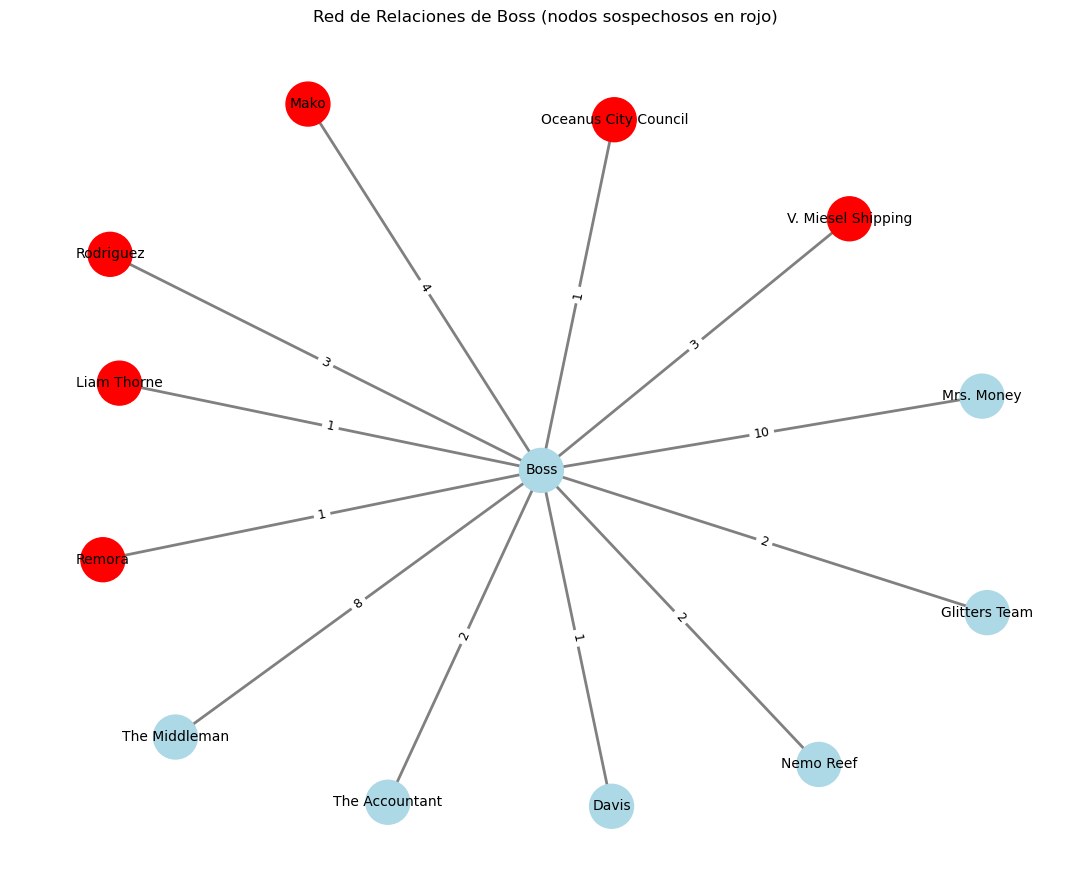

In [37]:
import networkx as nx
import matplotlib.pyplot as plt

# Filtrar mensajes donde participa Boss
df_boss = df[(df['source'].str.contains("Boss", case=False, na=False)) |
             (df['target'].str.contains("Boss", case=False, na=False))].copy()

# Contar relaciones únicas (quién habla con quién)
conteo_relaciones = {}
for _, row in df_boss.iterrows():
    source = row['source']
    target = row['target']
    
    if "Boss" in source:
        par = (source, target)
    else:
        par = (target, source)

    conteo_relaciones[par] = conteo_relaciones.get(par, 0) + 1

# Crear grafo
G = nx.DiGraph()
for (source, target), count in conteo_relaciones.items():
    G.add_edge(source, target, weight=count)

# Dibujar grafo con nodos sospechosos en rojo
plt.figure(figsize=(11, 9))
pos = nx.spring_layout(G, seed=42)

# Colorear nodos
node_colors = []
for node in G.nodes:
    if node in suspicious_entities:
        node_colors.append("red")           # sospechoso
    else:
        node_colors.append("lightblue")     # normal

# Dibujar elementos del grafo
nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=1000)
nx.draw_networkx_edges(G, pos, arrows=True, edge_color='gray', width=2)
nx.draw_networkx_labels(G, pos, font_size=10)

# Mostrar cantidad de interacciones en cada arista
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=9)

plt.title("Red de Relaciones de Boss (nodos sospechosos en rojo)")
plt.axis('off')
plt.tight_layout()
plt.show()


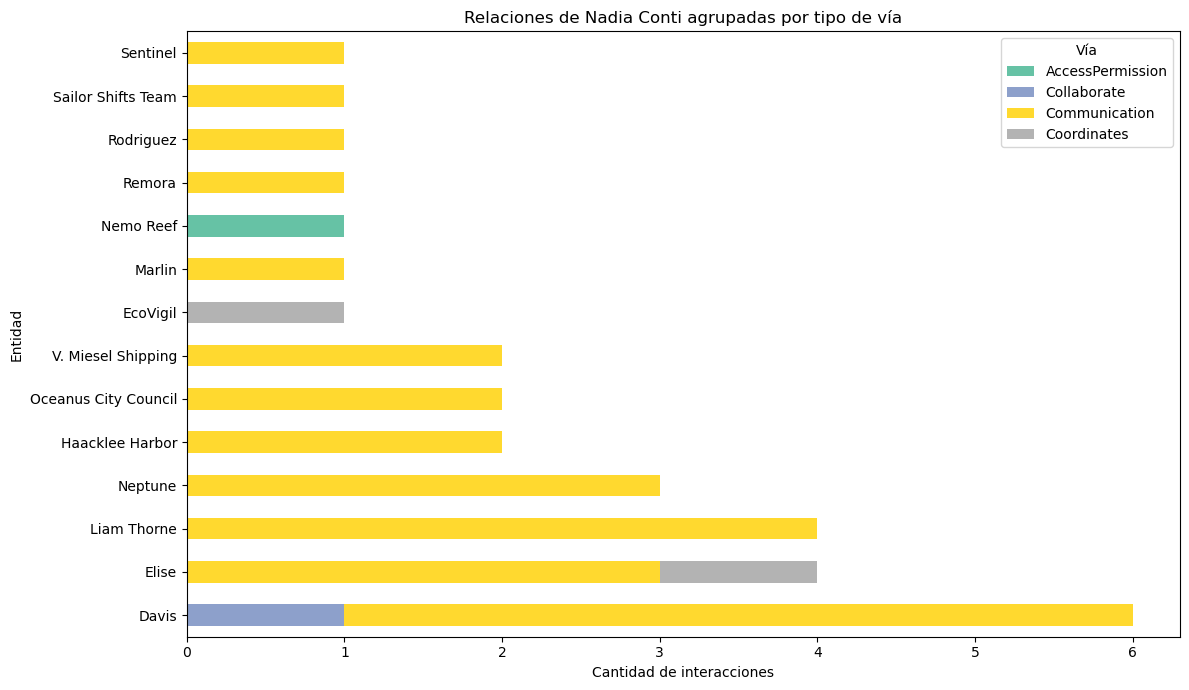

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

# Filtrar mensajes donde aparece Nadia Conti
df_nadia = df[
    df['source'].str.contains("Nadia Conti", case=False, na=False) |
    df['target'].str.contains("Nadia Conti", case=False, na=False)
].copy()

# Determinar con qué entidad se relaciona en cada fila
def get_other_party(row):
    if "Nadia Conti" in row['source']:
        return row['target']
    else:
        return row['source']

df_nadia['entidad'] = df_nadia.apply(get_other_party, axis=1)

# Agrupar por entidad y vía
resumen = df_nadia.groupby(['entidad', 'via']).size().reset_index(name='conteo')

# Pivotear para usar en gráfico de barras apiladas
pivot = resumen.pivot(index='entidad', columns='via', values='conteo').fillna(0)

# Ordenar por total
pivot = pivot.loc[pivot.sum(axis=1).sort_values(ascending=False).index]

# Graficar
pivot.plot(kind='barh', stacked=True, figsize=(12, 7), colormap="Set2")
plt.xlabel("Cantidad de interacciones")
plt.ylabel("Entidad")
plt.title("Relaciones de Nadia Conti agrupadas por tipo de vía")
plt.legend(title="Vía")
plt.tight_layout()
plt.show()


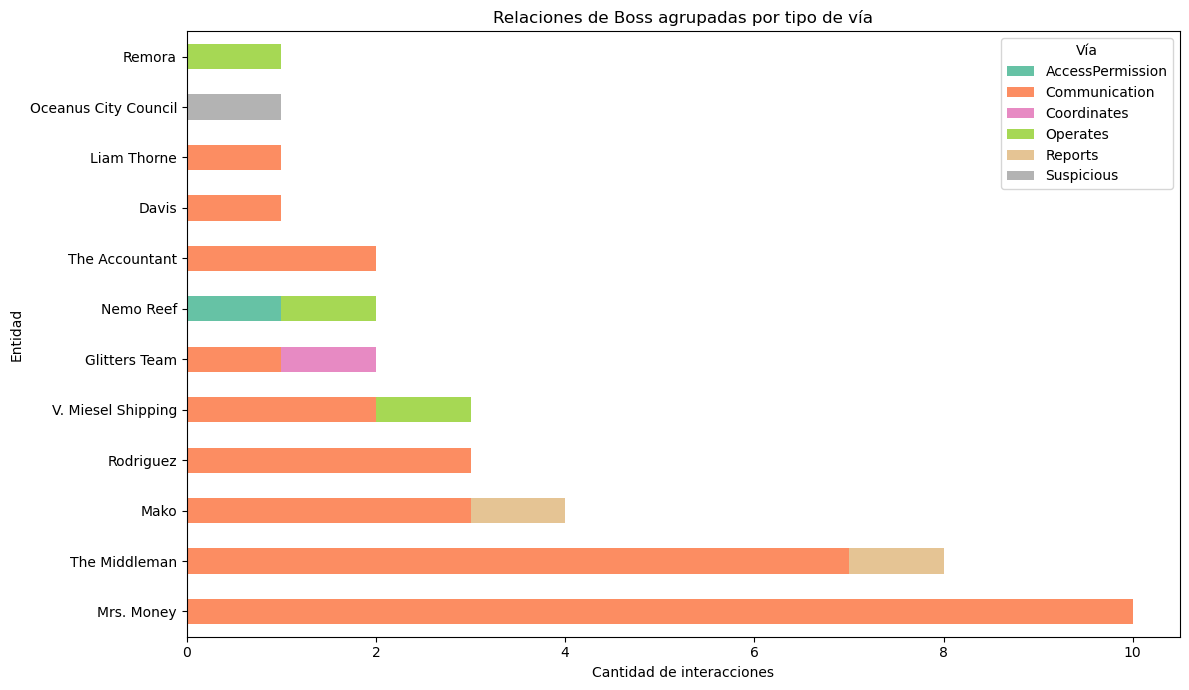

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

# Filtrar mensajes donde aparece Boss
df_boss = df[
    df['source'].str.contains("Boss", case=False, na=False) |
    df['target'].str.contains("Boss", case=False, na=False)
].copy()

# Determinar con qué entidad se relaciona en cada fila
def get_other_party(row):
    if "Boss" in row['source']:
        return row['target']
    else:
        return row['source']

df_boss['entidad'] = df_boss.apply(get_other_party, axis=1)

# Agrupar por entidad y vía
resumen = df_boss.groupby(['entidad', 'via']).size().reset_index(name='conteo')

# Pivotear para gráfico de barras apiladas
pivot = resumen.pivot(index='entidad', columns='via', values='conteo').fillna(0)

# Ordenar por total de interacciones
pivot = pivot.loc[pivot.sum(axis=1).sort_values(ascending=False).index]

# Graficar
pivot.plot(kind='barh', stacked=True, figsize=(12, 7), colormap="Set2")
plt.xlabel("Cantidad de interacciones")
plt.ylabel("Entidad")
plt.title("Relaciones de Boss agrupadas por tipo de vía")
plt.legend(title="Vía")
plt.tight_layout()
plt.show()


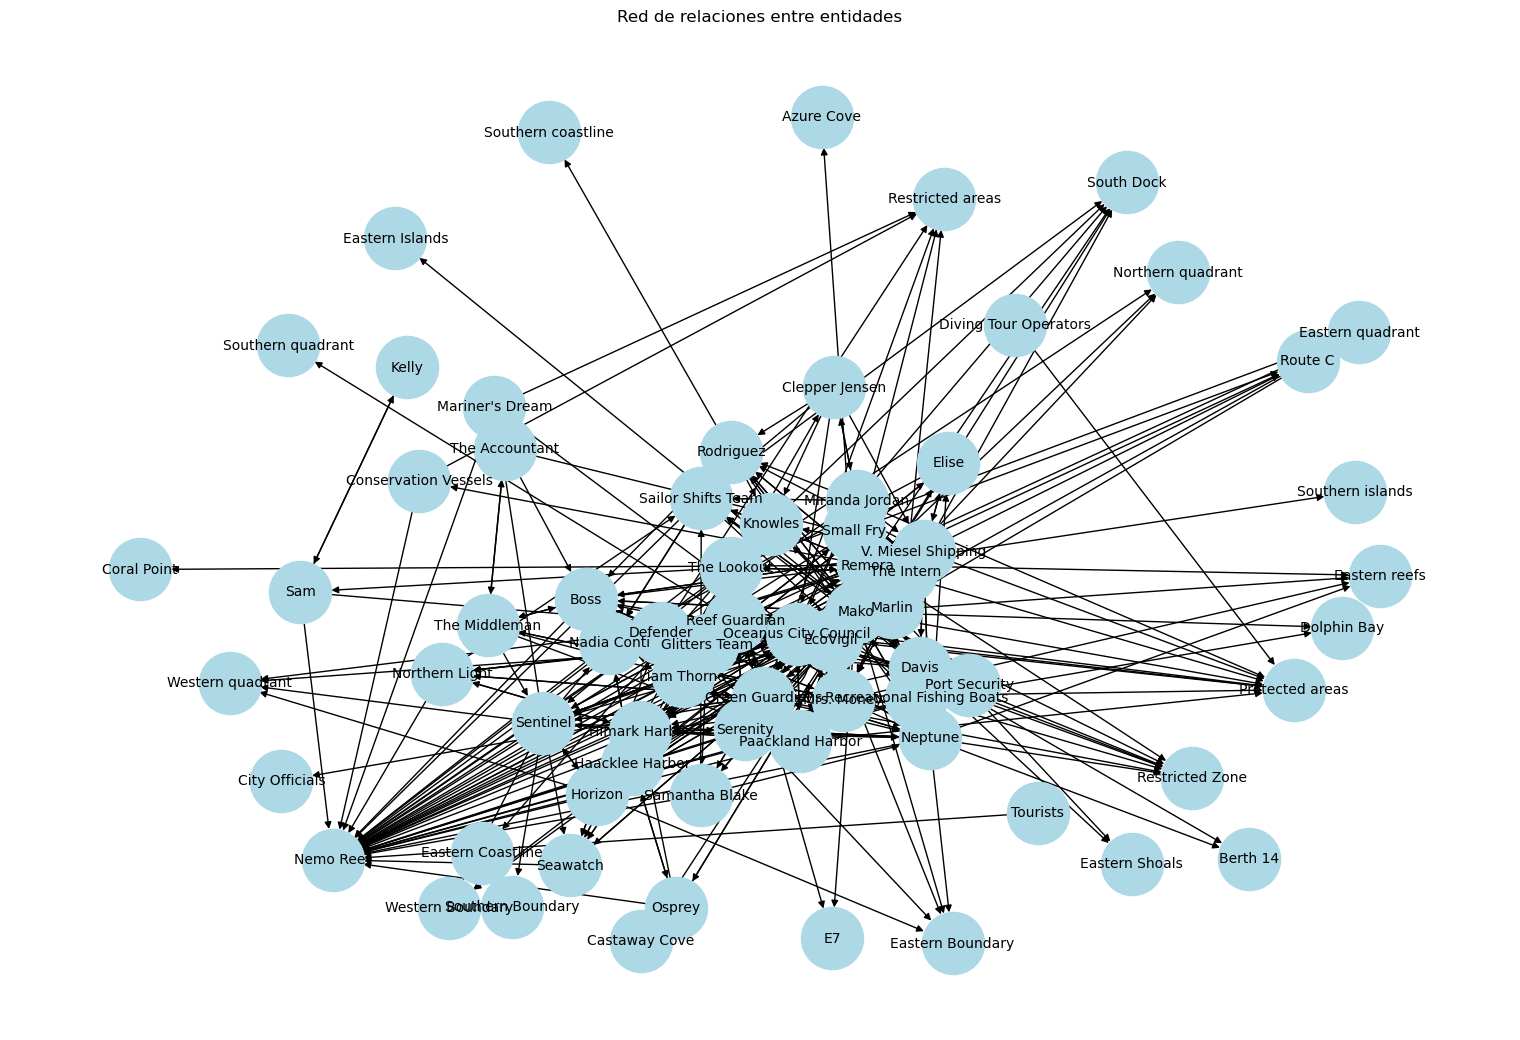

In [3]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd


# Crear grafo dirigido a partir de las relaciones
G = nx.DiGraph()
for _, row in df.iterrows():
    G.add_edge(row['source'], row['target'])

# Dibujar grafo simple
plt.figure(figsize=(15, 10))
pos = nx.spring_layout(G, k=0.7)
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=2000, font_size=10, arrows=True)
plt.title("Red de relaciones entre entidades")
plt.axis('off')
plt.show()
